# MARATONA BEHIND THE CODE 2021

## DESAFIO 2: QUANAM

##### Autor: Rodrigo Oliveira
##### LinkedIn: https://www.linkedin.com/in/rodrigolima82/

- `"ID":` número identificador da amostra
- `"ILLUM":` iluminação
- `"HUMID":` humidade
- `"CO2":` CO2
- `"SOUND":` som
- `"TEMP":` temperatura
- `"RYTHM":` ritmo cardíaco

# Parte 01. Importando as bibliotecas

In [1]:
# Pacotes padrao
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# Desativando warnings no jupyter
import warnings
warnings.filterwarnings('ignore')

# Parte 02. Carregando o Dataset

In [2]:
# Carregando o dataset IOT
iotDF = pd.read_csv('../../data/IOT.csv')

# Visualizando os primeiros registros
print(iotDF.shape)
iotDF.head()

(3200, 7)


,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM,ID
0,467.90,65.59,486.10,41.06,23.27,92.39,1
1,387.14,70.23,501.81,25.93,18.77,85.17,2
2,339.75,74.72,535.88,30.50,19.41,80.76,3
3,390.19,63.83,422.76,24.18,17.41,63.55,4
4,454.11,70.64,619.85,16.50,20.31,83.19,5


In [3]:
# Carregando o dataset ANSWERS
answers = pd.read_csv('../../data/answers.csv')

# Visualizando os primeiros registros
print(answers.shape)
answers.head()

(800, 7)


,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,0,337.90,63.29,518.13,22.38,18.59,0.0
1,1,342.96,63.19,488.85,37.36,20.41,0.0
2,2,369.86,57.39,516.86,26.45,20.89,0.0
3,3,304.65,67.80,517.50,32.98,22.52,0.0
4,4,442.25,68.21,500.91,37.28,21.88,0.0


In [4]:
iotDF.describe()

,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM,ID
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,439.163412,67.086106,501.620666,29.840194,20.042578,80.156616,1600.500000
std,89.915142,4.776214,42.951183,6.158710,1.648479,6.755854,923.904757
min,145.480000,51.860000,352.820000,8.060000,14.760000,55.370000,1.000000
25%,377.060000,63.770000,471.427500,25.550000,18.920000,75.657500,800.750000
50%,437.375000,66.935000,502.350000,29.885000,20.050000,80.220000,1600.500000
75%,500.792500,70.330000,530.142500,33.932500,21.180000,84.660000,2400.250000
max,775.140000,83.900000,672.380000,53.780000,26.290000,108.900000,3200.000000


In [5]:
answers.describe()

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.0
mean,399.5000,437.067287,66.601225,496.862512,30.516137,20.064813,0.0
std,231.0844,84.935208,5.069337,42.172339,6.347332,1.664799,0.0
min,0.0000,95.050000,48.350000,350.510000,13.340000,14.960000,0.0
25%,199.7500,381.865000,63.177500,468.780000,26.307500,18.937500,0.0
50%,399.5000,434.345000,66.565000,496.825000,30.465000,20.010000,0.0
75%,599.2500,496.280000,70.235000,524.467500,35.010000,21.182500,0.0
max,799.0000,741.840000,80.200000,652.550000,50.340000,25.890000,0.0


# Parte 03. EDA

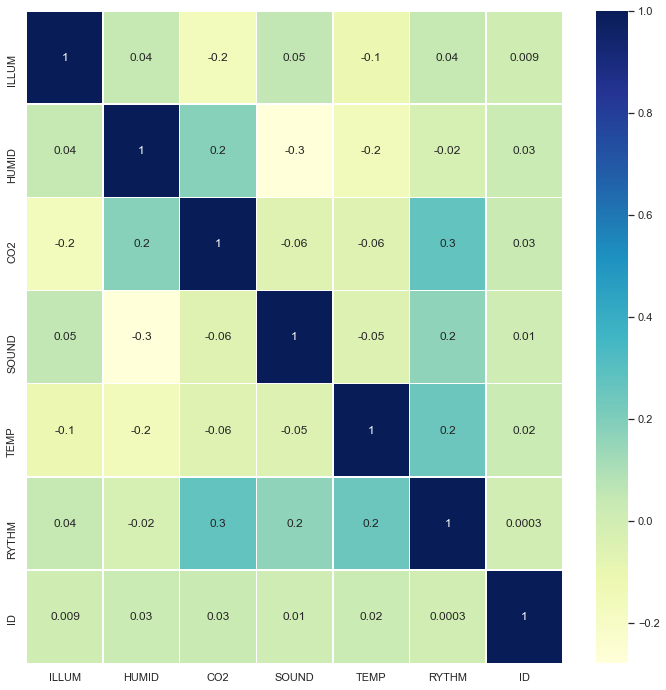

In [6]:
sns.set(rc={'figure.figsize':(12, 12)})
corr = iotDF.corr()
plt.figure() 
ax = sns.heatmap(corr, linewidths=.5, annot=True, cmap="YlGnBu", fmt='.1g')
plt.show()

# Parte 04. Tratamento dos dados

In [7]:
df = iotDF.copy()

In [8]:
# features do modelo
features = ['CO2','SOUND','TEMP','ILLUM','HUMID']

# coluna a ser prevista
target   = ['RYTHM']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ILLUM   3200 non-null   float64
 1   HUMID   3200 non-null   float64
 2   CO2     3200 non-null   float64
 3   SOUND   3200 non-null   float64
 4   TEMP    3200 non-null   float64
 5   RYTHM   3200 non-null   float64
 6   ID      3200 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 175.1 KB


# Parte 05. Modelagem Preditiva

In [10]:
# Models
from sklearn.linear_model import ElasticNet

# Misc
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import r2_score

In [11]:
# Split features and labels
X = df[features]
y = df[target]

# Verificando o shape apos o split entre feature e target
X.shape, y.shape

# Separando o dataset em dados de treino e teste (considerando a proporção 70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

R2 nos dados de Teste: 0.2401408276389767


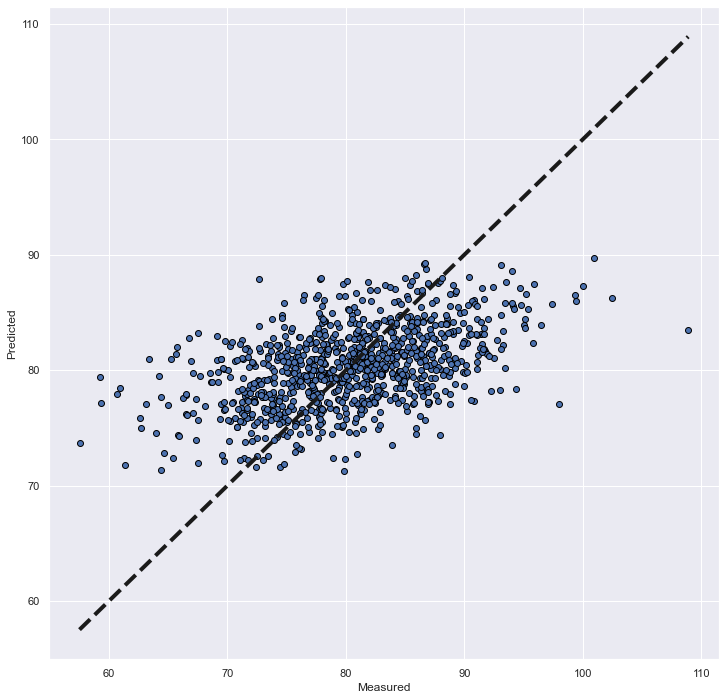

In [12]:
# Elastic Net Regression
eNet = ElasticNet(alpha=0.0005, random_state=42)

# Fit do modelo com os dados de treino
model_enet = eNet.fit(np.array(X_train), np.array(y_train))

# Fazendo as previsoes nos dados de teste
y_pred = cross_val_predict(model_enet, X_test, y_test, cv=5)
 
# Previsão
score = r2_score(y_test, y_pred)
print("R2 nos dados de Teste: {}".format(score))

# Visualizar
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Parte 06. Realizando Previsoes

In [13]:
# Deixando somente as features do modelo no dataset
X_test = answers[features]

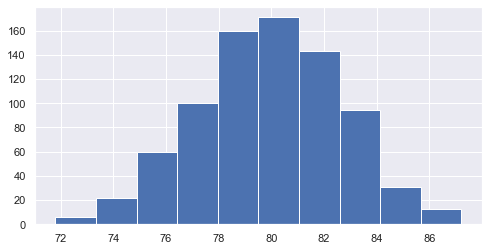

In [14]:
# Realizando as previsoes
answers['RYTHM'] = model_enet.predict(np.array(X_test))

sns.set(rc={'figure.figsize':(8, 4)})
plt.figure() 

plt.hist(answers['RYTHM'])
plt.show()

# Parte 07. Salvar resultado

In [15]:
answers.to_csv('../../submissao/ANSWERS.csv', index=False)